#### VALUE OPTIONS WITH VOLATILITY CONES USING PYTHON

Determining the volatility of the underlying asset is perhaps the single most important issue in practical option pricing. 

Many forecasting techniques exist, using historical returns data, implied volatility parameters from observed option prices, normal and non-normal probability distributions and more complex stochastic processes, non-market information, and more. 

But one of the most important aspects of the problem is seldom formally examined: estimation error. 

Even under ideal conditions, both measured volatility in a historical sample of returns and future realized volatility over an option's lifetime are subject to sampling error. 

Shorter samples have larger estimation error. 

A “volatility cone” is a plot of the range of volatilities within a fixed probability band around the true parameter, as a function of sample length.

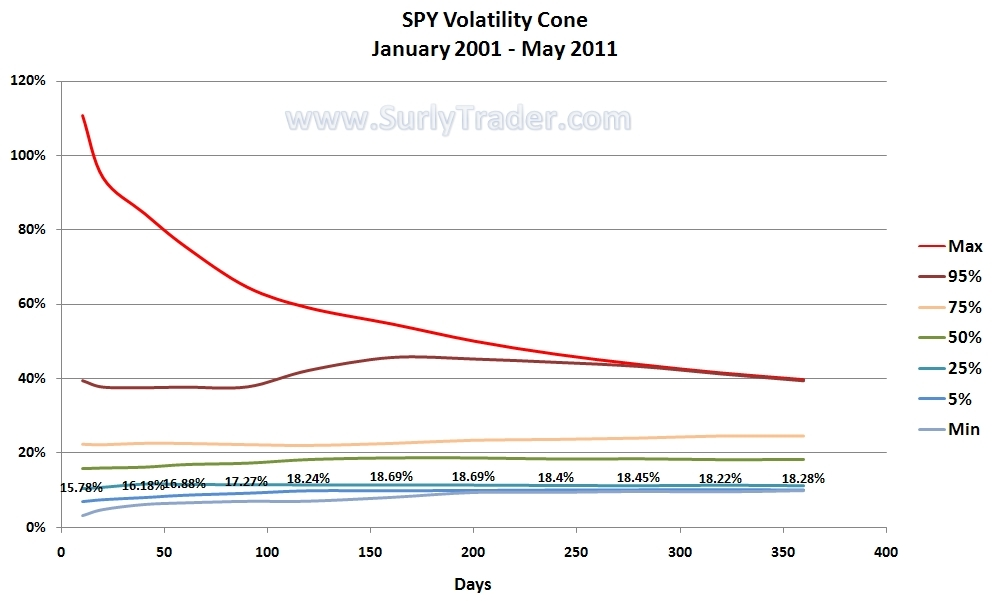

The hardest part of options trading is determining if they are cheap or expensive. 

Whether you buy or sell an option, you’re exposed to the volatility of the underlying. 

That’s why it’s important to compare volatility to its recent levels.

We can use Python and some third-party modules to compute the relative prices of options to help understand volatility and options pricing. 

### Step 1: Imports

In [2]:
%matplotlib inline

import math
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

### Step 2: Variables

Next, we’ll setup some variables we’ll use later. 

These are all Python lists. 

windows defines the number of days I want to use to compute volatility. 

quantiles defines the percentage of the top and bottom 25% of values. 

The last few lists are where we accumulate data to plot.


In [4]:
windows = [30, 60, 90, 120]
quantiles = [0.25, 0.75]

min_ = []
max_ = []
median = []
top_q = []
bottom_q = []
realized = []

Let's pull some data from Yahoo Finance with yfinance.

In [5]:
data = yf.download("JPM", start="2020-01-01", end="2022-11-30")

[*********************100%***********************]  1 of 1 completed


In [6]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,139.789993,141.100006,139.259995,141.089996,128.747040,10803700
2020-01-03,137.500000,139.229996,137.080002,138.339996,127.048058,10386800
2020-01-06,136.559998,138.270004,136.500000,138.229996,126.947037,10259000
2020-01-07,137.279999,137.860001,135.820007,135.880005,124.788849,10531300
2020-01-08,135.699997,137.580002,135.600006,136.940002,125.762314,9695300
...,...,...,...,...,...,...
2022-11-22,134.000000,135.270004,133.690002,135.039993,135.039993,9185700
2022-11-23,134.940002,136.500000,134.860001,136.479996,136.479996,7316200
2022-11-25,136.479996,137.139999,136.059998,136.740005,136.740005,3220500


### Step 3: Realized Volatility

Realized volatility is a measurement of how much the price or returns of stock vary. 

It’s used to optimize portfolios, detect regime changes, and price derivatives. 

The most common way to measure realized volatility is the standard deviation.

In [8]:
def realized_vol(price_data, window=30):

    log_return = (price_data["Close"] / price_data["Close"].shift(1)).apply(np.log)

    return log_return.rolling(window=window, center=False).std() * math.sqrt(252)

The next step is to loop through each of the windows and compute realized volatility over each time frame. 

estimator is a pandas DataFrame. 

That’s why it’s so easy so compute the min, max, median, and quantiles. 

In [9]:
for window in windows:
    
    # get a dataframe with realized volatility
    estimator = realized_vol(window=window, price_data=data)
    
    # append the summary stats to a list
    min_.append(estimator.min())
    max_.append(estimator.max())
    median.append(estimator.median())
    top_q.append(estimator.quantile(quantiles[1]))
    bottom_q.append(estimator.quantile(quantiles[0]))
    realized.append(estimator[-1])

### Step 4: Data Visualization

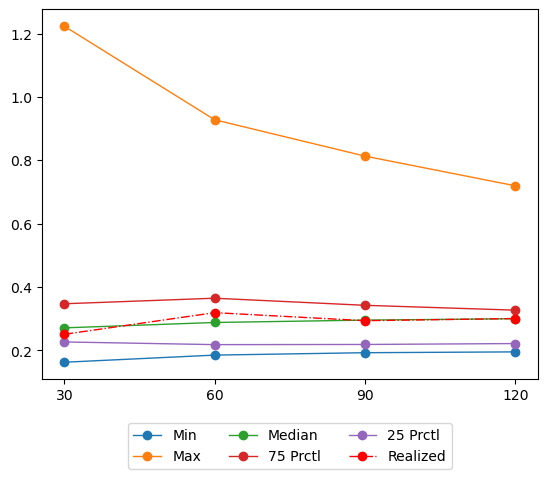

In [11]:
# create the plots on the chart
plt.plot(windows, min_, "-o", linewidth=1, label="Min")
plt.plot(windows, max_, "-o", linewidth=1, label="Max")
plt.plot(windows, median, "-o", linewidth=1, label="Median")
plt.plot(windows, top_q, "-o", linewidth=1, label=f"{quantiles[1] * 100:.0f} Prctl")
plt.plot(windows, bottom_q, "-o", linewidth=1, label=f"{quantiles[0] * 100:.0f} Prctl")
plt.plot(windows, realized, "ro-.", linewidth=1, label="Realized")

# set the x-axis labels
plt.xticks(windows)

# format the legend
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=3)

The first 6 lines create the lines on the chart. 

The other two align the x-axis labels and format the legend.

### Step 5: Analysis

The y-axis is the realized volatility over each time frame. 

The x-axis is time frame we use to compute the realized volatility.

There are three conclusions you can draw from this chart:

1. Over the 30-day window, there is a spike in realized volatility. Realized volatility spikes usually correspond to a drop in the stock price. This should tell us to explore the stock price to see what happened.
2. Realized volatility (the dashed line) is close to the lowest it’s been across all time frames. This is a data point to support a case to get long volatility (i.e. options are cheap).
3. Realized volatility is mean reverting. You can see this in the cone shape of the chart. This is a data point to support a case to get long volatility.